# Penyakit Utama Puskesmas di Surabaya

Dataset diperoleh dari:

https://opendata.surabaya.go.id/dataset/banyaknya-penyakit-utama-yang-ditemukan-di-puskesmas-menurut-jenis-penyakit-tahun-2023

# Eksplorasi Data Awal

**Memahami Struktur Data**
1. Mengidentifikasi jumlah baris dan kolom dalam dataset.
2. Memeriksa tipe data masing-masing kolom.

**Penanganan Nilai Hilang dan Duplikat**
1. Mengidentifikasi apakah ada nilai yang hilang atau duplikat dalam dataset.
2. Menentukan strategi untuk menangani nilai yang hilang atau duplikat.



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

drive.mount('/content/drive')
path = '/content/drive/MyDrive/Dataset Repository/Data Penyakit Surabaya 2023.csv'

df = pd.read_csv(path, sep=';')
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Wilayah,Kecamatan,Nama Faskes (Rumah Sakit dan Puskesmas),Jenis Penyakit,Januari,Februari,Maret,April,Mei,Juni,Juli,Agustus,September,Oktober,November
0,Surabaya Barat,Asem Rowo,Puskesmas Asemrowo,Penyakit Infeksi dan parasit,235.0,224,722.0,205,238.0,157.0,224.0,226.0,218.0,221.0,234.0
1,Surabaya Barat,Asem Rowo,Puskesmas Asemrowo,Neoplasma,26.0,32,89.0,19,29.0,29.0,27.0,33.0,26.0,28.0,36.0
2,Surabaya Barat,Asem Rowo,Puskesmas Asemrowo,Penyakit darah dan organ pembentuk darah terma...,10.0,5,22.0,7,9.0,4.0,8.0,5.0,5.0,8.0,3.0
3,Surabaya Barat,Asem Rowo,Puskesmas Asemrowo,"Endokrin, nutrisi dan gangguan metabolik",281.0,189,642.0,85,141.0,119.0,109.0,142.0,162.0,172.0,204.0
4,Surabaya Barat,Asem Rowo,Puskesmas Asemrowo,Gangguan jiwa dan perilaku,22.0,23,82.0,10,11.0,13.0,19.0,13.0,12.0,11.0,18.0


In [ ]:
# Jumlah baris dan kolom dalam dataset
print("Jumlah Baris dan Kolom:", df.shape)

# Tipe data masing-masing kolom
print("\nTipe Data:\n", df.dtypes)

# Statistik deskriptif untuk kolom-kolom numerik
print("\nStatistik Deskriptif:\n", df.describe())

# Identifikasi nilai yang hilang atau duplikat
print("\nJumlah Nilai Hilang:\n", df.isnull().sum())
print("\nJumlah Duplikat:\n", df.duplicated().sum())

Jumlah Baris dan Kolom: (1323, 16)

Tipe Data:
 Wilayah                                     object
Kecamatan                                   object
Nama Faskes (Rumah Sakit dan Puskesmas)     object
Jenis Penyakit                              object
Januari                                    float64
Februari                                     int64
Maret                                      float64
April                                        int64
Mei                                        float64
Juni                                       float64
Juli                                       float64
Agustus                                    float64
September                                  float64
Oktober                                    float64
November                                   float64
Total Kasus                                float64
dtype: object

Statistik Deskriptif:
            Januari     Februari        Maret        April          Mei  \
count  1323.000000  1323

# Data Visualization

1. Distribusi Jumlah Kasus Penyakit per Wilayah
2. Radar Chart untuk Menampilkan Perbandingan Jumlah Kasus antara Bulan

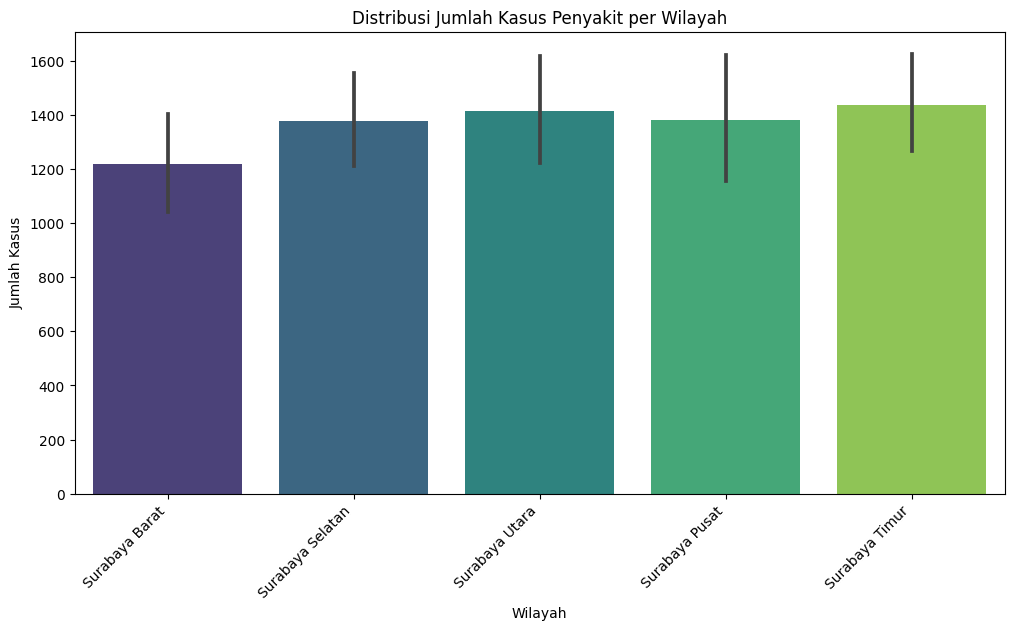

In [ ]:
# Distribusi Jumlah Kasus Penyakit per Wilayah

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df['Total Kasus'] = df.iloc[:, 4:].sum(axis=1)

plt.figure(figsize=(12, 6))
sns.barplot(x='Wilayah', y='Total Kasus', data=df, palette='viridis')
plt.title('Distribusi Jumlah Kasus Penyakit per Wilayah')
plt.xlabel('Wilayah')
plt.ylabel('Jumlah Kasus')
plt.xticks(rotation=45, ha='right')
plt.show()

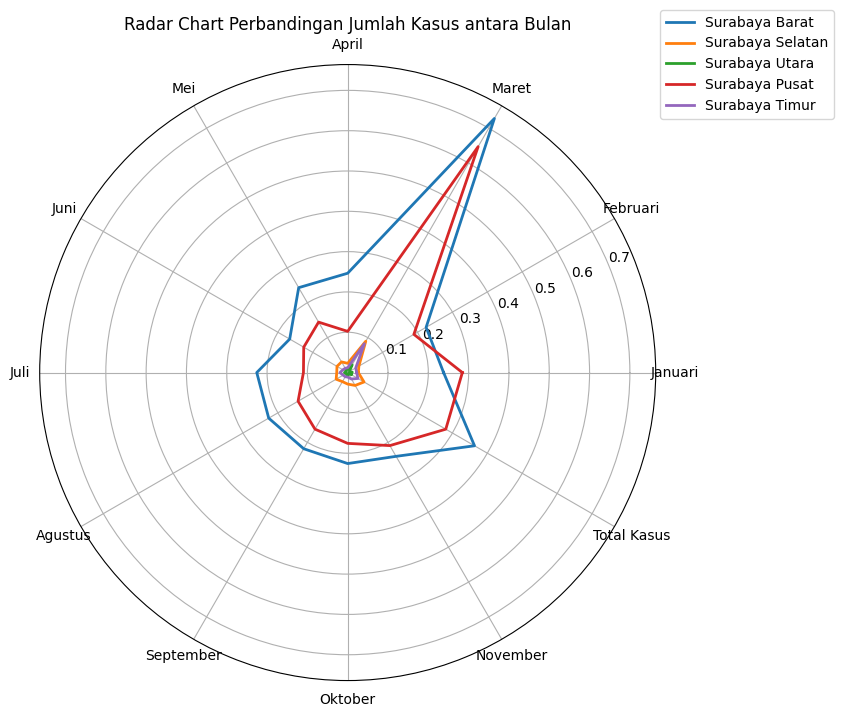

In [ ]:
# Radar Chart untuk Menampilkan Perbandingan Jumlah Kasus antara Bulan

from math import pi
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df.iloc[:, 4:16])

categories = df.columns[4:16]
angles = [n / float(len(categories)) * 2 * pi for n in range(len(categories))]
angles += angles[:1]

plt.figure(figsize=(8, 8))
for i in range(len(df['Wilayah'].unique())):
    values = scaled_data[i]
    values = np.append(values, values[:1])
    plt.polar(angles, values, label=df['Wilayah'].unique()[i], linewidth=2)
plt.title('Radar Chart Perbandingan Jumlah Kasus antara Bulan')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.xticks(angles[:-1], categories)
plt.show()

# Prediksi Jumlah Kasus di Masa Depan

1. Model regresi linier digunakan untuk memprediksi jumlah kasus berdasarkan 'Wilayah' dan 'Jenis Penyakit'.
2. Visualisasi scatter plot membantu melihat sejauh mana prediksi model mendekati nilai aktual.
3. *Mean Squared Error* (MSE) memberikan metrik kuantitatif tentang seberapa baik model bekerja, di mana nilai MSE yang lebih rendah menunjukkan kinerja yang lebih baik.

Mean Squared Error: 686.0945771101362


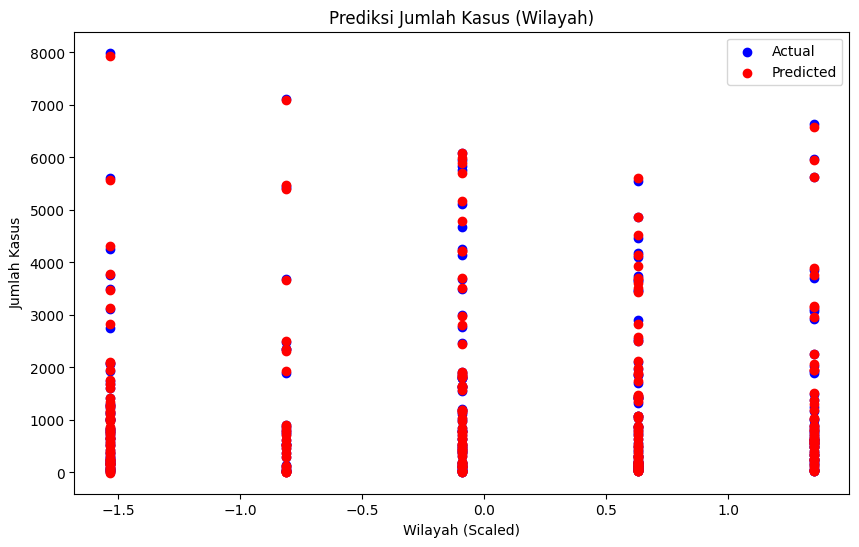

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, LabelEncoder

df['Jumlah Bulan'] = df.iloc[:, 5:16].sum(axis=1)

# Memisahkan fitur dan target
X = df[['Wilayah', 'Jenis Penyakit', 'Jumlah Bulan']].copy()
y = df['Total Kasus']

# Label encode kolom 'Wilayah' dan 'Jenis Penyakit'
le = LabelEncoder()
X['Wilayah'] = le.fit_transform(X['Wilayah'])
X['Jenis Penyakit'] = le.fit_transform(X['Jenis Penyakit'])

# Normalisasi data menggunakan Min-Max Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Memisahkan data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Membuat model regresi linier
model = LinearRegression()
model.fit(X_train, y_train)

# Melakukan prediksi pada data testing
y_pred = model.predict(X_test)

# Evaluasi model dengan Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

plt.figure(figsize=(10, 6))
plt.scatter(X_test[:, 0], y_test, color='blue', label='Actual')
plt.scatter(X_test[:, 0], y_pred, color='red', label='Predicted')
plt.title('Prediksi Jumlah Kasus (Wilayah)')
plt.xlabel('Wilayah (Scaled)')
plt.ylabel('Jumlah Kasus')
plt.legend()
plt.show()